# Задача 1. Разведочный анализ

Описание задания:
- [+] Самостоятельно скачать данные (из открытых источников по интересующей тематике, на сайте [kaggle](https://www.kaggle.com), [UCI](https://archive.ics.uci.edu/ml/datasets.php) репозитория, [Google Dataset Search](https://datasetsearch.research.google.com/) и др.). Для полного балла нужно выбрать данные, в которых есть пропущенные значения.
- [+] Считать данные и вывести их основные характеристики, описание признаков.
- [+] Сформулировать задачу предсказания, какой признак интересно было бы предсказывать по остальным.
- [+] * (+2 балла) Произвести чистку данных (**Data Cleaning**). Например, заполнить пропущенные значения чем то осмысленным для поставленной задачи.
- [+] Провести анализ признаков, используя визуализацию (**hist(), boxplot(), countplot(), barplot()** и тд), сделать выводы, которые могут быть полезны при дальнейшем решении задачи предсказания.
- [+] * (+1 балл) Оценить зависимость между признаками (визуализация или построение матрицы корреляции).
- [+] * (+2 балла) Выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные если это нужно), убрать ненужные признаки, создать новые (**Feature Engineering**).


Данные (датасет [automobile](https://archive.ics.uci.edu/dataset/10/automobile)) взяты из репозитория [UCI](https://archive.ics.uci.edu/dataset).

### Описание датасета
* symboling - рейтинг страхового риска
* normalized-losses - относительная средняя выплата за ущерб за год страхования транспортного средства
* make - производитель
* fuel-type - тип топлива
* aspiration - наличие модификации для улучшения аспирацим двигателя
* num-of-doors - количество дверей
* body-style - тип авто
* drive-wheels - привод
* engine-location - расположение двигателя
* wheel-base - длина колёсной базы (расстояние между передней и задней осями авто)
* length - длина авто
* width - ширина авто
* height - высота авто
* curb-weight - вес автомобиля (без пассажиров и багажа)
* engine-type - тип двигателя
* num-of-cylinders - количество цилиндров
* engine-size - объём двигателя
* fuel-system - топливная система
* bore - диаметр цилиндра
* stroke - полный ход поршня по цилиндру в любом направлении
* compression-ratio - коэффициент сжатия
* horsepower - количество лошадиных сил
* peak-rpm - пиковые обороты в минуту
* city-mpg - расход в городе (миль/галон)
* highway-mpg - расход на трассе (миль/галон)
* price - цена

### Формулировка задачи предсказания

Задача состоит в том, чтобы предсказать стоимости авто исходя по заданным характеристикам. (признак "Price")

In [609]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

import warnings
warnings.filterwarnings('ignore')  # отключаем предупреждения

pd.set_option('display.max_columns', 500)


df = pd.read_csv("data/automobile.csv")
df



,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


### Анализ признаков

Проверим количество пропущенных значений 
> пропущенные значения отмечены знаком '?', поэтому сначала необходимо их заменить

In [610]:
for key in df:
    df[key].replace({'?': None},inplace =True)
df.isnull().sum()


symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

Признак *normalized-losses* имеет наибольшее количество потерянных значений. Также встречается ещё 6 характеристик, в которых имеется 2 (*num-of-doors*, *horsepower*, *peak-rpm*), либо 4 (*bore*, *stroke*, *price*) пропущенных значений.

In [611]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

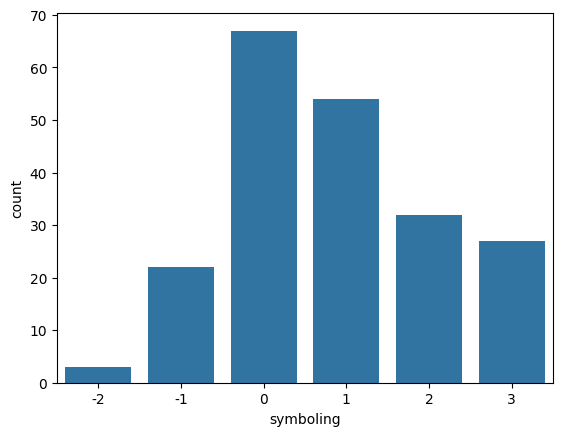

In [612]:
sns.countplot(df, x='symboling');


Наиболее популярные оценки рейтинга страхования это 0 и 1. Эти оценки говорят о том, что большая часть автомобилей имеет средний рейтинг страхования.

In [613]:
sym_series = df['symboling'].value_counts()
sym_good = sym_series[sym_series.index.isin([-3, -2, -1])].sum()
sym_bad = sym_series[sym_series.index.isin([1, 2, 3])].sum()
sym_neutral = sym_series[sym_series.index.isin([0])].sum()
def sym_print(v):
    return f"{v} ({(v / sym_series.sum()) * 100:.1f}%)"
print(f"Good: {sym_print(sym_good)}, Bad: {sym_print(sym_bad)}, Neutral: {sym_print(sym_neutral)}")


Good: 25 (12.2%), Bad: 113 (55.1%), Neutral: 67 (32.7%)


Можно отметить, что "хороших" оценок (от -3 до -1) меньше, чем "плохих". Вероятность, что автомобиль будет оценен "хорошей" оценкой составляет 0.12 (от 1 до 3), "плохой" - 0.55. А оставшаяся треть оценок - нейтральные.

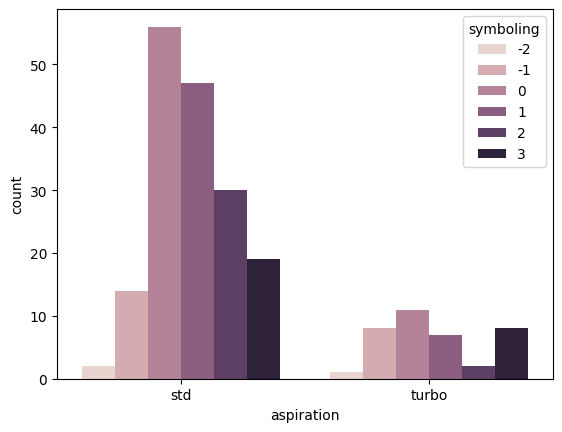

In [614]:
sns.countplot(df,x='aspiration',hue='symboling');


На данном графике изображена зависимость *symboling* с разделением по наличию модификации *aspiration*.
Для стандартного значения *aspiration* можно видеть монотонное возрастание количества машин от -2 до 0 и монотонное убывание от 0 до 3. При этом для "турбированных" модификаций график аналогичен за исключением самой "плохой" оценки (+3). 

Также для стандартного значения можно заметить большой скачок между "-1" и "0", тогда как для "турбированной" модификации распределение оценок является более равномерным.

Проведём анализ зависимостей признаков, которые будут полезны для задачи предсказания стоимости авто.

Рассмотрим зависимость стоимости от характеристик авто

In [615]:
df_price = df[df['price'].isnull() == False]
df_price['price'] = df_price['price'].astype('int')
df_price.groupby('engine-type').aggregate({'price':'mean'})\
        .rename(columns={'price':'mean_price'})


,mean_price
engine-type,
dohc,18116.416667
l,14627.583333
ohc,11567.358621
ohcf,13738.600000
ohcv,25098.384615
rotor,13020.000000


Можно заметить, что наиболее дорогие машины имеют тип двигателя "ohcv", при этом отрыв в стоимости значителен. Наиболее дешёвые машины имеют тип двигателя "ohc", в среднем стоимость таких авто более чем в два раза меньше, чем самых дорогих.

In [616]:
df_price.groupby('drive-wheels').aggregate({'price':'mean'})\
        .rename(columns={'price':'mean_price'})


,mean_price
drive-wheels,
4wd,10241.000000
fwd,9244.779661
rwd,19757.613333


В данной таблице представлена зависимость стоимости от типа привода. Интересно, что заднеприводные авто почти в два раза дороже, чем полноприводные (!) и переднеприводные.

In [617]:
df_price.groupby('engine-location').aggregate({'price':'mean'})\
        .rename(columns={'price':'mean_price'})


,mean_price
engine-location,
front,12884.085859
rear,34528.000000


Также очевидно, что положение двигателя значительно влияет на стоимость, так как заднее расположение двигателей характерно для спортивных автомобилей.

In [618]:
df_price.groupby(['body-style', 'engine-location'])['body-style','engine-location','price'].aggregate({'engine-location':'count','price': 'mean'})\
        .rename(columns={'engine-location':'count'})


count         price
body-style  engine-location                     
convertible front                5  18863.000000
            rear                 1  37028.000000
hardtop     front                6  18518.666667
            rear                 2  33278.000000
hatchback   front               68   9957.441176
sedan       front               94  14459.755319
wagon       front               25  12371.960000

Действительно, заднее расположение двигателя встречается только у кабриолетов и автомобилей с "жёстким верхом", которые обычно являются спортивными.
Также можно сделать вывод о том, что самые доступные авто - это "hatchback"'и с передним расположением двигателей.

Проверим гипотезу о том, что стоимость зависит от производителя:

In [619]:
df_price.groupby(['make','body-style'])['body-style','make','price'].aggregate({'price': 'mean', 'make': 'count'})\
        .rename(columns={'make':'count'})


price  count
make          body-style                      
alfa-romero   convertible  14997.500000      2
              hatchback    16500.000000      1
audi          sedan        17647.000000      5
              wagon        18920.000000      1
bmw           sedan        26118.750000      8
chevrolet     hatchback     5723.000000      2
              sedan         6575.000000      1
dodge         hatchback     7819.800000      5
              sedan         7619.666667      3
              wagon         8921.000000      1
honda         hatchback     7054.428571      7
              sedan         9945.000000      5
              wagon         7295.000000      1
isuzu         hatchback    11048.000000      1
              sedan         6785.000000      1
jaguar        sedan        34600.000000      3
mazda         hatchback    10085.000000     10
              sedan        11464.142857      7
mercedes-benz convertible  35056.000000      1
              hardtop      36788.000000      2
              sedan        33074.000000      4
              wagon        28248.000000      1
mercury       hatchback    16503.000000      1
mitsubishi    hatchback     9597.888889      9
              sedan         8434.000000      4
nissan        hardtop       8249.000000      1
              hatchback    14409.000000      5
              sedan         8604.555556      9
              wagon         9915.666667      3
peugot        sedan        15758.571429      7
              wagon        15017.500000      4
plymouth      hatchback     8130.500000      4
              sedan         7150.500000      2
              wagon         8921.000000      1
porsche       convertible  37028.000000      1
              hardtop      33278.000000      2
              hatchback    22018.000000      1
renault       hatchback     9895.000000      1
              wagon         9295.000000      1
saab          hatchback    15013.333333      3
              sedan        15433.333333      3
subaru        hatchback     6591.333333      3
              sedan         9070.600000      5
              wagon         9342.000000      4
toyota        convertible  17669.000000      1
              hardtop       9762.333333      3
              hatchback     9616.000000     14
              sedan         9542.200000     10
              wagon         9836.000000      4
volkswagen    convertible  11595.000000      1
              hatchback     9980.000000      1
              sedan         9673.888889      9
              wagon        12290.000000      1
volvo         sedan        18726.875000      8
              wagon        16293.333333      3

При этом важно делать также разделение по типу автомобиля, поскольку это даёт более точную картину. 
Поэтому при попытке предсказывания стоимости необходимо учитывать среднюю стоимость авто конкретной марки и конкретного типа авто.

### Чистка данных и преобразование признаков
Заполним пропущенные значения чем-то осмысленным.


In [620]:
df_clean = df[(df['price'].isnull() == False) & (df['bore'].isnull() == False)\
              & (df['stroke'].isnull() == False) & (df['num-of-doors'].isnull() == False)\
              & (df['horsepower'].isnull() == False) & (df['peak-rpm'].isnull() == False)
              & (df['normalized-losses'].isnull() == False)]
df_clean['price'] = df_clean['price'].astype('int')
df_clean['bore'] = df_clean['bore'].astype('float')
df_clean['stroke'] = df_clean['stroke'].astype('float')
df_clean['horsepower'] = df_clean['horsepower'].astype('int')
df_clean['peak-rpm'] = df_clean['peak-rpm'].astype('int')
df_clean['normalized-losses'] = df_clean['normalized-losses'].astype('int')


Перед проведением чистки изучим зависимости признаков, которые содержат пропущенные значения. Для этого были удалены строчки, которые содержат пропущенные значения.

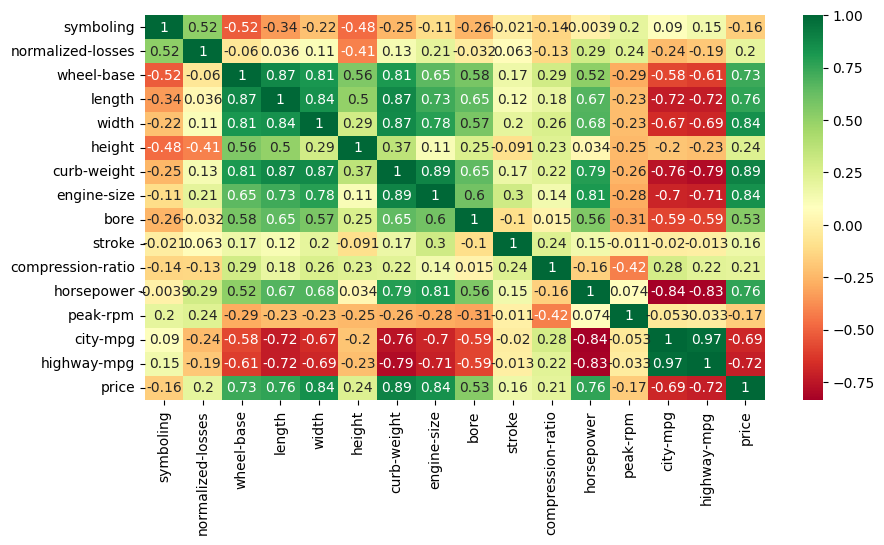

In [621]:
sns.heatmap(df_clean.corr(), annot=True, cmap='RdYlGn')
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()


Нам интересны признаки *normalized-losses*, *bore*, *stroke*, *horsepower*, *peak-rpm*, *num-of-doors*, *peak-rpm*.
Но можно заметить, что только признак *horsepower* значительно влияет на стоимость, поскольку имеют наиболее высокое значение корреляции.
Поэтому остальные признаки удалим, а для значения *horsepower* подберём значения.

Также уберём другие ненужные признаки: 
* highway-mpg - определяется из *city-mpg*
* compression-ratio - имеет низкое значение корреляции (и не даёт значимой дополнительной информации об авто)

In [622]:
df.drop(columns=['normalized-losses', 'bore', 'stroke', 'num-of-doors', 'peak-rpm'], inplace=True)
df.drop(columns=['city-mpg', 'compression-ratio'], inplace=True)
df[df['horsepower'].isnull() == True]


,symboling,make,fuel-type,aspiration,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,horsepower,highway-mpg,price
130,0,renault,gas,std,wagon,fwd,front,96.1,181.5,66.5,55.2,2579,ohc,four,132,mpfi,None,31,9295
131,2,renault,gas,std,hatchback,fwd,front,96.1,176.8,66.6,50.5,2460,ohc,four,132,mpfi,None,31,9895


In [623]:
df_clean[df_clean['body-style'].isin(['wagon','hatchback'])].groupby(['make','body-style']).aggregate({'highway-mpg':'mean','horsepower':'mean'})


highway-mpg  horsepower
make          body-style                         
chevrolet     hatchback     48.000000   59.000000
dodge         hatchback     34.200000   90.200000
              wagon         30.000000   88.000000
honda         hatchback     38.285714   74.000000
              wagon         34.000000   76.000000
mazda         hatchback     33.833333   76.000000
mercedes-benz wagon         25.000000  123.000000
mitsubishi    hatchback     34.833333   85.000000
nissan        hatchback     28.800000  137.200000
              wagon         32.000000   96.666667
plymouth      hatchback     36.333333   79.333333
              wagon         30.000000   88.000000
porsche       hatchback     27.000000  143.000000
saab          hatchback     27.333333  126.666667
subaru        hatchback     32.666667   71.666667
              wagon         28.750000   92.250000
toyota        hatchback     33.428571   93.000000
              wagon         33.666667   62.000000
volkswagen    hatchback     29.000000   90.000000
volvo         wagon         26.000000  130.000000

In [624]:
df.at[130,"horsepower"]=92
df.at[131,"horsepower"]=108


Для 130-го авто: тип "wagon", скорость "31", поэтому примерная мощность "92" лошадиные силы
Для 131-го авто: тип "hatchback", скорость "31", поэтому примерная мощность "108" лошадиные силы.
 

Необходимости в преобразовывании категориальных признаков в количественные в нашем случае нет.

## Оценка зависимости между признаками

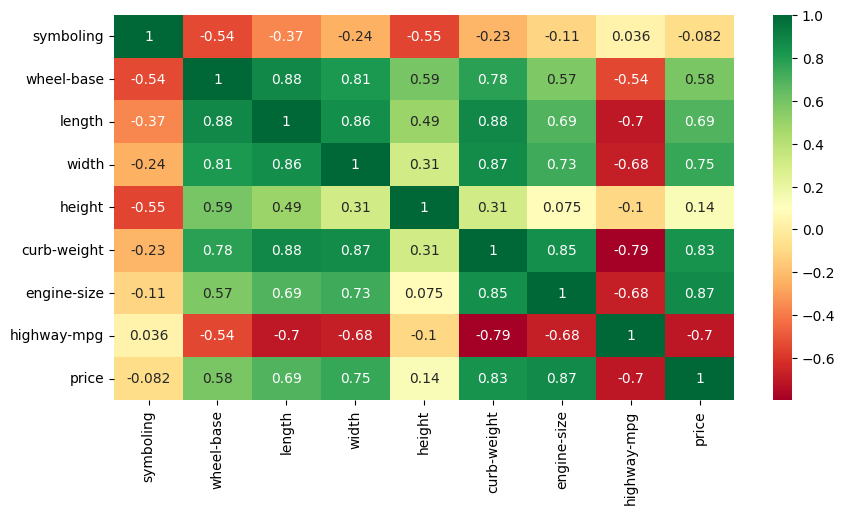

In [625]:
df_price = df[df['price'].isnull() == False]
df_price['price'] = df_price['price'].astype('int')

sns.heatmap(df_price.corr(), annot=True, cmap='RdYlGn')
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()


На картинке представлена матрица корреляции для количественных признаков. Можно заметить, что в среднем признаки имеют высокую корреляцию.

Наиболее интересной для нас является цена, но также представлены признаки, значения корреляции для которых оказалось неожиданно низким. Таких признаков два: *symboling* и *height*. Отсутствие корреляции с первым свойством контринтуитивно, поскольку разумно предположить, что с рейтинг страхового риска должен соответствовать цене авто (чем больше цена авто, тем меньше рейтинг). Однако это утверждение неверно исходя из представленных данных.

Также отсутствует зависимость цены от высоты автомобиля, однако в данном случае отсутствие корреляции более очевидно.

Исходя из картинки также можно увидеть ряд признаков (длина/высота/вес/объём двигателя), для которых корреляция с ценой имеет достаточно высокий коэффициент. Это очевидно, так как чем больше/длиннее/быстрее автомобиль, тем больше будет и цена.